In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from tqdm import tqdm
warnings.filterwarnings("ignore")
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

In [33]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [3]:
file_train_name='./Benz_data/train.csv'
file_test_name='./Benz_data/test.csv'

In [4]:
Train=pd.read_csv(file_train_name,index_col='ID')
Test=pd.read_csv(file_test_name,index_col='ID')
target=Train['y']
Train.drop(['y'],axis=1,inplace=True)

In [5]:
print("Train shape",Train.shape)
print("Test shape",Test.shape)

Train shape (4209, 376)
Test shape (4209, 376)


count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64
----------------------------------
target>170 1


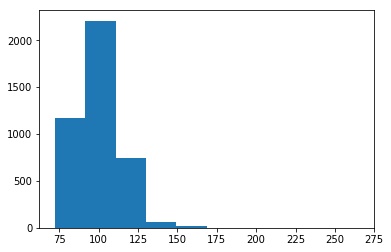

In [6]:
print(target.describe())
plt.hist(target)
print("----------------------------------")
print("target>170 %d"%(np.sum(target>170)))

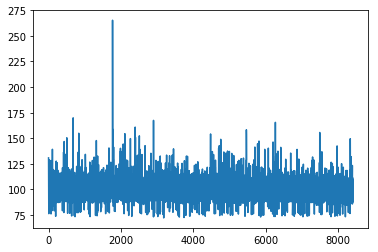

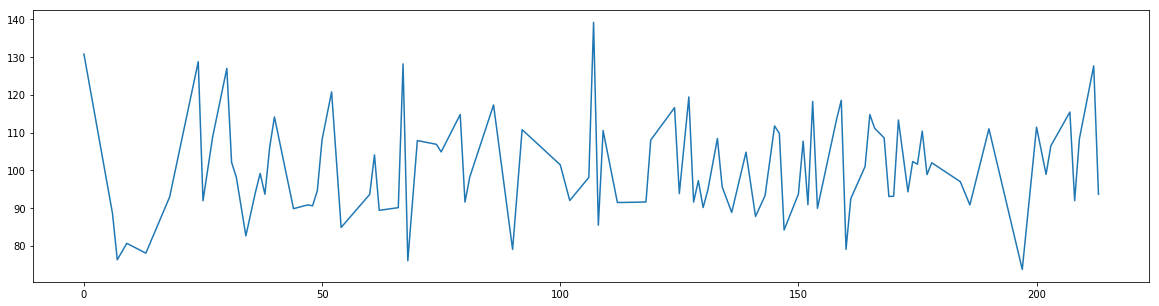

In [7]:
plt.plot(target)
plt.figure(figsize=(20,5))
plt.plot(target[:100])

In [8]:
print("feature number %d"%(Train.shape[1]))
print('-----------------------------------')
Train.dtypes.value_counts()

feature number 376
-----------------------------------


int64     368
object      8
dtype: int64

In [9]:
feature=[[],[],[]]
for c in Train.columns:
    t=Train[c].dtype
    u=len(np.unique(Train[c]))
    if t==object:
        feature[0].append(c)
    elif u==1:
        feature[1].append(c)
    else:
        feature[2].append(c)
    
print("String:%d\nConstant:%d\nCategorical:%d"%(len(feature[0]),len(feature[1]),len(feature[2])))
print("String features:",feature[0])
print("Constant features:",feature[1])

String:8
Constant:12
Categorical:356
String features: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
Constant features: ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']


In [10]:
Categorical_mean=[np.mean(Train[c]) for c in feature[2]]
Categorical_name=np.array(feature[2])[np.argsort(Categorical_mean)]
Categorical_mean=np.sort(Categorical_mean)

<BarContainer object of 10 artists>

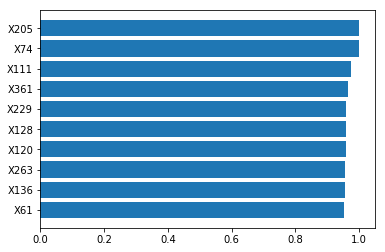

In [11]:
plt.barh(range(len(Categorical_mean[-10:])),Categorical_mean[-10:],tick_label=Categorical_name[-10:])

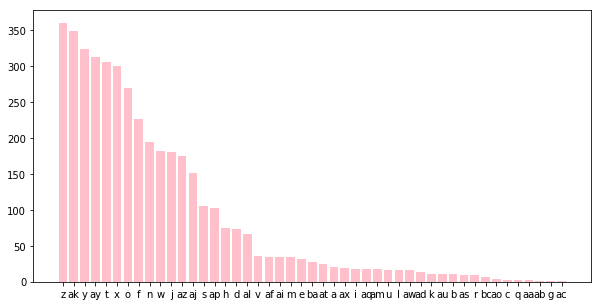

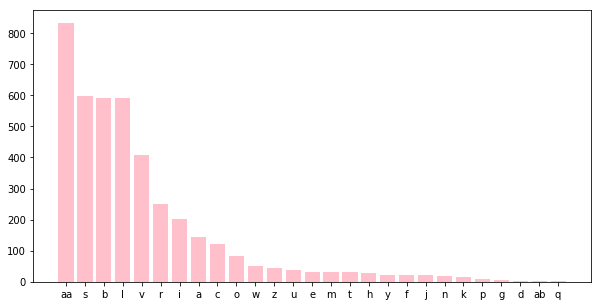

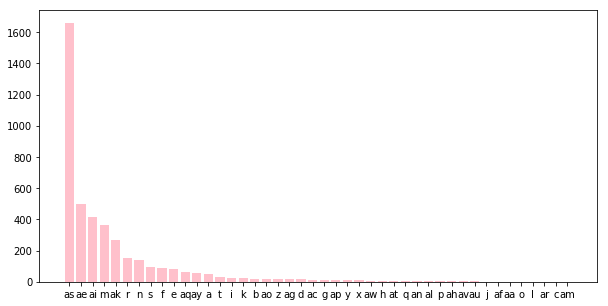

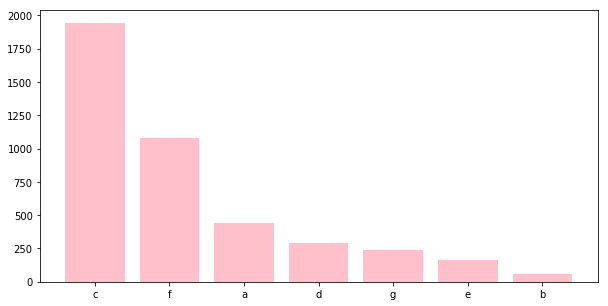

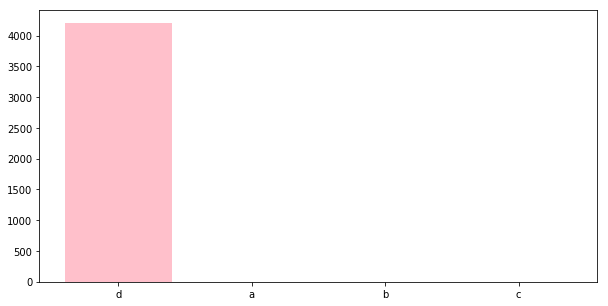

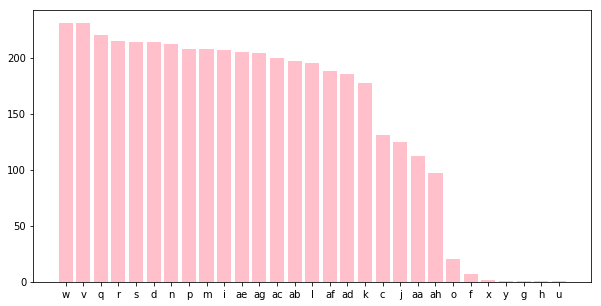

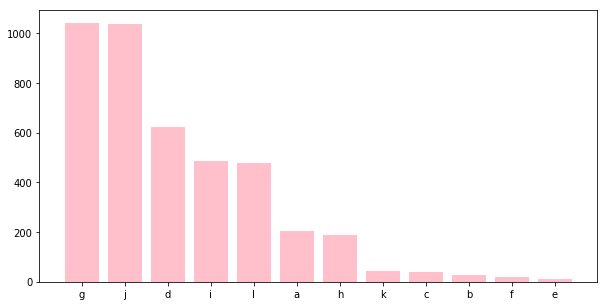

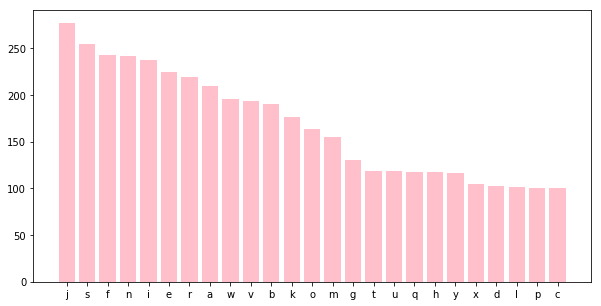

In [12]:
for i in range(len(feature[0])):
    tmp=Train[feature[0][i]].value_counts()
    plt.figure(figsize=(10,5))
    plt.bar(range(len(tmp)),tmp.values,tick_label=tmp.index,color='pink')

In [13]:
feature[1]

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [14]:
Train.drop(feature[1],axis=1,inplace=True)
Test.drop(feature[1],axis=1,inplace=True)

In [15]:
for i in feature[0]:
    Train[i]=Train[i].map(lambda x:sum([ord(c) for c in x]))
    Test[i]=Test[i].map(lambda x:sum([ord(c) for c in x]))

In [92]:
params={
        'learning_rate': 0.1, 
        'n_estimators': 47, 
        'max_depth': 3, 
        'min_child_weight': 3, 
        'seed': 0,
        'subsample': 0.9, 
        'colsample_bytree': 0.9, 
        'gamma': 0.01, 
        'reg_alpha': 0.05, 
        'reg_lambda': 2
}

reg=xgb.XGBRegressor(**params)
# optimized_GBM=GridSearchCV(estimator=reg, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=-1)
# optimized_GBM.fit(Train,target)
    
reg.fit(Train,target)

[20:08:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.9, gamma=0.01,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=3, missing=None, n_estimators=47,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0.05, reg_lambda=2, scale_pos_weight=1, seed=0,
       silent=None, subsample=0.9, verbosity=1)

In [85]:
# print(optimized_GBM.best_score_)
# print(optimized_GBM.best_params_)

0.5684704070847015
{'learning_rate': 0.1}


In [93]:
csv=pd.DataFrame({'ID':Test.index,'y':reg.predict(Test)})
csv.to_csv('XXX.csv',index=False)